In [184]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sysはコマンドライン引数
import sys
import csv
import pulp
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)

J_list = 0
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape

#クラスタ数宣言
c=3
#Kはクラスタサイズ(整数部分抽出)
K=X_size//c
#max繰り返し回数の宣言
max_iter=100

sum_distance = []
#クラスター番号を格納するリスト
#目的関数を格納するリスト
best_centroids = np.zeros((c,dimension))
u_value = np.zeros((X_size,c))

NumberOfRepetitions=50

In [186]:
#uの最適化部分関数作成
def u_optimize(d,c):
    prob = pulp.LpProblem(name="u_best", sense=pulp.LpMinimize)
    #変数定義
    u=[]

    for i in range(X_size):
        sublist = []
        for j in range(c):
            sublist.append(pulp.LpVariable(name='u{}_{}'.format(i,j), cat='Countinuous', lowBound=0))
        u.append(sublist)

    #目的関数
    obj=0
    for i in range(X_size):
        for j in range(c):
            obj += d[i][j]*u[i][j]
    prob.setObjective(obj)

    #制約条件
    for i in range(X_size):
        prob += pulp.lpSum([u[i][j] for j in range(c)]) == 1 # sum
    for j in range(c):
        prob += pulp.lpSum([u[i][j] for i in range(X_size)]) >= K  # sum
        prob += pulp.lpSum([u[i][j] for i in range(X_size)]) <= K + 1 # sum

    #解く
    prob.solve(pulp.PULP_CBC_CMD(msg=0))
    for i in range(X_size):
        for j in range(c):
            u_value[i][j] = u[i][j].value()
    return u_value

In [187]:
def v_calculation(u):
    #クラスタ中心の計算
    v=np.zeros((c,dimension))
    for i in range(c):    
        #分母
        numerator=0
        #分子
        denominator=0
        for j in range(X_size):
            numerator+=u[j][i]
            denominator+=u[j][i]*X[j]
        v[i]=denominator/numerator
    return v

In [188]:
for s in range (NumberOfRepetitions):
    print(f"{s+1}回目")
    centroids = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        #dの作成
        d=np.zeros((X_size,c))
        for i in range(X_size):
            #各クラスタ中心との距離の格納
            d[i] = np.sum((centroids - X[i]) ** 2, axis=1)

        u = u_optimize(d,c)
        #クラスター中心の更新
        new_centroids = v_calculation(u)
        
        if np.sum(np.abs(new_centroids-centroids))<=0.000001:
            print("中心が変わらないのでbreakします！")
            break
        centroids = np.copy(new_centroids)
        
        
    #目的関数の作成
    new_cluster = np.argmax(u,axis=1)
    J = 0
    for i in range(c):
        J+= np.sum((X[new_cluster==i]-centroids[i])**2)
    #この初期値のときの結果が優れている場合，bestを更新
    if s == 0:
        np_cluster = np.copy(new_cluster)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    elif best_J > J:
        np_cluster = np.copy(new_cluster)
        best_J = J
        best_centroids =  np.copy(new_centroids)
        best_u = np.copy(u)
    print(f"{s+1}回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(np_cluster)
print(best_J)
print(best_centroids)

1回目
中心が変わらないのでbreakします！
1回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
2回目
中心が変わらないのでbreakします！
2回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
3回目
中心が変わらないのでbreakします！
3回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
4回目
中心が変わらないのでbreakします！
4回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
5回目
中心が変わらないのでbreakします！
5回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
6回目
中心が変わらないのでbreakします！
6回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
7回目
中心が変わらないのでbreakします！
7回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [5.006 3.418 1.464 0.244]
 [6.702 3.016 5.556 1.992]]
終了
8回目
中心が変わらないのでbreakします！
8回目のクラスタリング結果↓
81.3672
[[5.822 2.728 4.256 1.36 ]
 [

In [189]:
print(np.sum(best_u, axis=0))#列ごとの総和
print(np.sum(best_u, axis=1))#行ごとの総和

[50. 50. 50.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [190]:
#クラスター番号ごとに実際に振り分けられた個数を数える
unique, counts = np.unique(np_cluster, return_counts=True)
print(unique)
print(counts)

[0 1 2]
[50 50 50]


<Figure size 432x288 with 0 Axes>

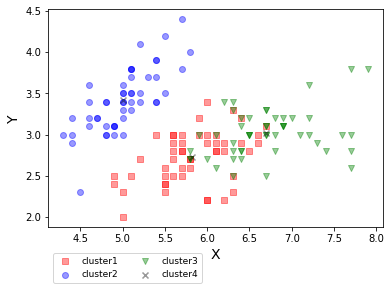

In [191]:
#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i],alpha=0.4)
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x",alpha=0.4)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left') 
plt.show()


#fig.savefig("ransuu_ecbo.pdf",bbox_inches='tight')

##　正解とのクラスター番号を合わせる作業セル

In [192]:
#正解リスト作成
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [193]:
np_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [194]:
cluster_hensyuu = np_cluster
cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 100, cluster_hensyuu)
cluster_hensyuu_1 = np.where(cluster_hensyuu_0==0, 1, cluster_hensyuu_0)
cluster_hensyuu_2 = np.where(cluster_hensyuu_1==100, 0, cluster_hensyuu_1)
cluster_hensyuu_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [195]:
# ------正解率の算出
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values

seikaisuu = np.count_nonzero(cluster_hensyuu_2==seikai)
seikairitu= (np.count_nonzero(cluster_hensyuu_2==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(cluster_hensyuu_2==0))
print(np.count_nonzero(cluster_hensyuu_2==1))
print(np.count_nonzero(cluster_hensyuu_2==2))

正解率
92.0
正解数
138
クラスタサイズ確認
50
50
50


In [196]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Fの算出

In [201]:
#引数(クラスタ数(c),クラスター(cluster),データセット(X),クラスター中心(v)、\
#ファジィ化パラム(m)、帰属度(u))

def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])
        # print("Jの算出")
        # print(u_m[i],d[i])
        # print(kakunin_J)


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [202]:
best_J

81.3672

In [204]:
F = calc_F(c,np_cluster,X,best_centroids,1,best_u)

center_distance
[[ 0.       10.182676  2.946768]
 [10.182676  0.       22.837988]
 [ 2.946768 22.837988  0.      ]]
d_{ki}
[1.0619604e+01 2.1592000e-02 2.3284260e+01]
new_d{ki} = d_{ki}+d_{ii*}
[2.0802280e+01 2.1592000e-02 4.6122248e+01]
Jの値: 81.3672
Jの値を再計算: 81.36719999999997
Fの値: 81.36719999999997


In [215]:
best_J

81.3672

In [210]:
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [212]:
df["cluster"]= np_cluster
df["u1"]=best_u[:,0]
df["u2"]=best_u[:,1]
df["u3"]=best_u[:,2]
df["J"] =best_J
df["F"] =best_J

In [214]:
df.to_csv('Iris-ecbo.csv',index = False)

In [ ]:
df.drop